# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

weather_api_key

'322e075203239c7be3e9d95bc7ab0e71'

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 645


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
units = "metric"
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather_json = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_json['coord']['lat']
        city_lng = city_weather_json['coord']['lon']
        city_max_temp = city_weather_json['main']['temp_max']
        city_humidity = city_weather_json['main']['humidity']
        city_clouds = city_weather_json['clouds']['all']
        city_wind = city_weather_json['wind']['speed']
        city_country = city_weather_json['sys']['country']
        city_date = city_weather_json['sys']['sunrise']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | skjervoy
Processing Record 2 of Set 1 | khandyga
Processing Record 3 of Set 1 | carovigno
Processing Record 4 of Set 1 | la rioja
Processing Record 5 of Set 1 | makakilo city
Processing Record 6 of Set 1 | acari
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | avarua
Processing Record 9 of Set 1 | inhambane
Processing Record 10 of Set 1 | fengxian
Processing Record 11 of Set 1 | vanderhoof
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | thompson
Processing Record 14 of Set 1 | kaitangata
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | qandala
Processing Record 20 of Set 1 | marfino
Processing Record 21 of Set 1 | adelaide
Processing Record 22 of Set 1 | atuona
Processing Record 23 of Set 1 | caldwel

In [4]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          595
Lat           595
Lng           595
Max Temp      595
Humidity      595
Cloudiness    595
Wind Speed    595
Country       595
Date          595
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,skjervoy,70.0311,20.9714,1.00,81,100,4.83,NO,1667199635
1,khandyga,62.6667,135.6000,-15.85,91,84,1.02,RU,1667255443
2,carovigno,40.7080,17.6550,21.82,74,7,4.66,IT,1667193487
3,la rioja,42.2500,-2.5000,10.88,76,55,1.13,ES,1667198491
4,makakilo city,21.3469,-158.0858,30.18,58,20,8.75,US,1667234096


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,skjervoy,70.0311,20.9714,1.00,81,100,4.83,NO,1667199635
1,khandyga,62.6667,135.6000,-15.85,91,84,1.02,RU,1667255443
2,carovigno,40.7080,17.6550,21.82,74,7,4.66,IT,1667193487
3,la rioja,42.2500,-2.5000,10.88,76,55,1.13,ES,1667198491
4,makakilo city,21.3469,-158.0858,30.18,58,20,8.75,US,1667234096


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

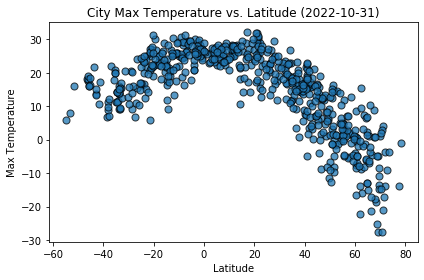

In [8]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df["Lat"]
temperature = city_data_df["Max Temp"]
date = city_data_df.loc[0,"Date"]

# Using datetime.fromtimestamp() function to convert epoch time into datetime object (found online)
mytimestamp = datetime.fromtimestamp(date)  
  
# Using strftime() function to convert (found online)
datetime_str = mytimestamp.strftime( "%Y-%m-%d")  

plt.scatter(x=latitude, y=temperature, s=50, edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Max Temperature vs. Latitude ({datetime_str})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

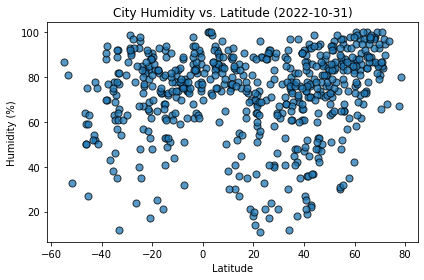

In [9]:
# Build the scatter plots for latitude vs. humidity
latitude = city_data_df["Lat"]
humidity = city_data_df["Humidity"]

plt.scatter(x=latitude, y=humidity, s=50, edgecolors="black", alpha=0.75)


# Incorporate the other graph properties
plt.title(f"City Humidity vs. Latitude ({datetime_str})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

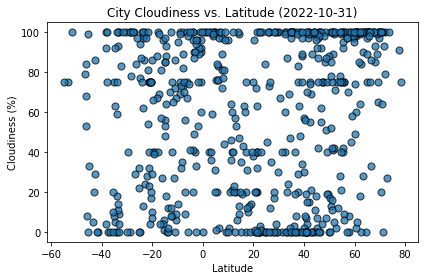

In [10]:
# Build the scatter plots for latitude vs. cloudiness
latitude = city_data_df["Lat"]
cloudiness = city_data_df["Cloudiness"]
plt.scatter(x=latitude, y=cloudiness, s=50, edgecolors="black", alpha=0.75)


# Incorporate the other graph properties
plt.title(f"City Cloudiness vs. Latitude ({datetime_str})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

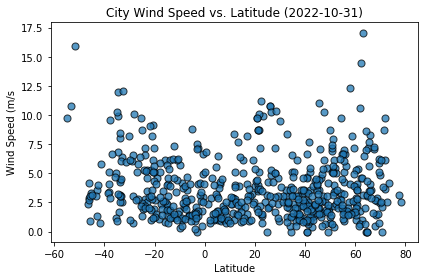

In [11]:
# Build the scatter plots for latitude vs. wind speed
latitude = city_data_df["Lat"]
wind_speed = city_data_df["Wind Speed"]
plt.scatter(x=latitude, y=wind_speed, s=50, edgecolors="black", alpha=0.75)


# Incorporate the other graph properties
plt.title(f"City Wind Speed vs. Latitude ({datetime_str})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [61]:
# Define a function to create Linear Regression plots

def linear_regression_plot(x_values, y_values, annotate_location, xlabel, ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    line_eq = f"y={round(slope,2)}x + {round(intercept,2)}"
    regress_values = slope * x_values + intercept

    print(f"The r-value is: {rvalue}")

    plt.scatter(x_values, y_values, s=50, edgecolors="black", alpha=0.75)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.plot(x_values,regress_values,"red")
    plt.annotate(line_eq, xy=annotate_location,fontsize=15,color="red")
    plt.show()

    
    


In [58]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,skjervoy,70.0311,20.9714,1.00,81,100,4.83,NO,1667199635
1,khandyga,62.6667,135.6000,-15.85,91,84,1.02,RU,1667255443
2,carovigno,40.7080,17.6550,21.82,74,7,4.66,IT,1667193487
3,la rioja,42.2500,-2.5000,10.88,76,55,1.13,ES,1667198491
4,makakilo city,21.3469,-158.0858,30.18,58,20,8.75,US,1667234096


In [38]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,acari,-15.4311,-74.6158,20.32,68,6,2.33,PE,1667211748
7,avarua,-21.2078,-159.7750,25.03,69,75,8.23,CK,1667231781
8,inhambane,-23.8650,35.3833,23.30,85,100,7.17,MZ,1667271130
11,port alfred,-33.5906,26.8910,13.99,92,93,4.43,ZA,1667272353
13,kaitangata,-46.2817,169.8464,17.50,59,53,2.90,NZ,1667236641


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8523765801995282


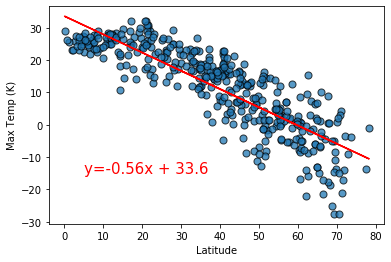

In [59]:
# Linear regression on Northern Hemisphere
northern_temp = northern_hemi_df["Max Temp"]
northern_lat = northern_hemi_df["Lat"]

linear_regression_plot(northern_lat, northern_temp, (5,-15), "Latitude", "Max Temp (K)")

The r-value is: 0.6937199767391996


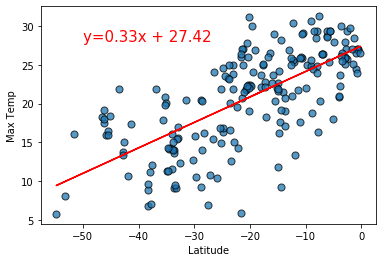

In [60]:
# Linear regression on Southern Hemisphere
southern_temp = southern_hemi_df["Max Temp"]
southern_lat = southern_hemi_df["Lat"]

linear_regression_plot(southern_lat, southern_temp, (-50,28), "Latitude", "Max Temp")

**Discussion about the linear relationship:** Both graphs show a moderate to strong

### Humidity vs. Latitude Linear Regression Plot

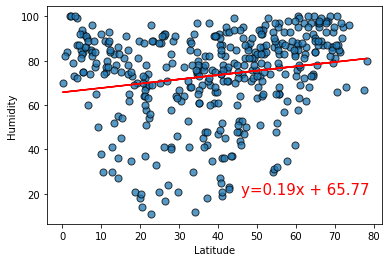

The r-value is: 0.18992252244316576


In [43]:
# Northern Hemisphere
northern_lat = northern_hemi_df["Lat"]
northern_hum = northern_hemi_df["Humidity"]

linear_regression_plot(northern_lat, northern_hum, (46,20), "Latitude", "Humidity")

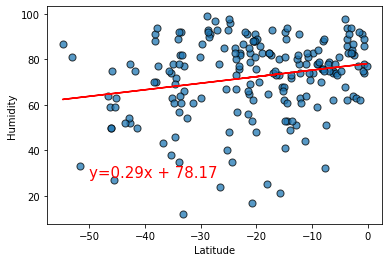

The r-value is: 0.21897288396067477


In [44]:
# Southern Hemisphere
southern_lat = southern_hemi_df["Lat"]
southern_hum = southern_hemi_df["Humidity"]

linear_regression_plot(southern_lat, southern_hum, (-50,28), "Latitude", "Humidity")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

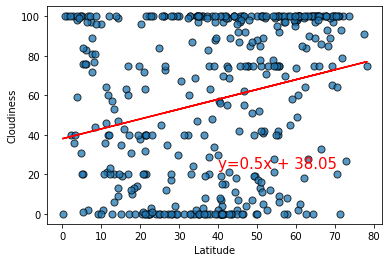

The r-value is: 0.2474844172794752


In [45]:
# Northern Hemisphere
northern_lat = northern_hemi_df["Lat"]
northern_cloud = northern_hemi_df["Cloudiness"]

linear_regression_plot(northern_lat, northern_cloud, (40, 23), "Latitude", "Cloudiness")

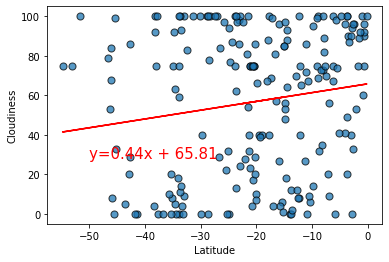

The r-value is: 0.1593510444596367


In [46]:
# Southern Hemisphere
southern_lat = southern_hemi_df["Lat"]
southern_cloud = southern_hemi_df["Cloudiness"]

linear_regression_plot(southern_lat, southern_cloud, (-50,28), "Latitude", "Cloudiness")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

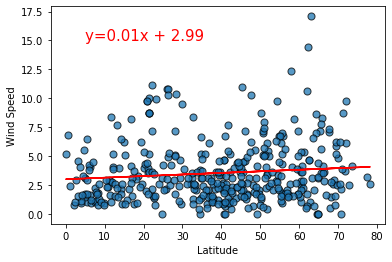

The r-value is: 0.10370334646587893


In [49]:
# Northern Hemisphere
northern_lat = northern_hemi_df["Lat"]
northern_wind = northern_hemi_df["Wind Speed"]

linear_regression_plot(northern_lat, northern_wind, (5, 15), "Latitude", "Wind Speed")

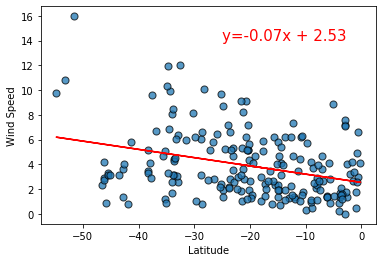

The r-value is: -0.32638587944337444


In [53]:
# Southern Hemisphere
southern_lat = southern_hemi_df["Lat"]
southern_wind = southern_hemi_df["Wind Speed"]

linear_regression_plot(southern_lat, southern_wind, (-25,14), "Latitude", "Wind Speed")

**Discussion about the linear relationship:** YOUR RESPONSE HERE